In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%run functions.ipynb
%run Appliance_Information_Tools.ipynb

In [4]:
house=read_clean_house(7,6000000, drop_appliances=True)


In [33]:
house.info()
house.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5999939 entries, 2013-11-01 22:01:18 to 2015-04-19 05:48:44
Data columns (total 1 columns):
 #   Column     Dtype
---  ------     -----
 0   Aggregate  int64
dtypes: int64(1)
memory usage: 91.6 MB


,Aggregate
Time,
2013-11-01 22:01:18,211
2013-11-01 22:01:32,212
2013-11-01 22:01:47,211
2013-11-01 22:02:01,211
2013-11-01 22:02:47,209


In [43]:
condensed_house = house.resample('15T').mean()


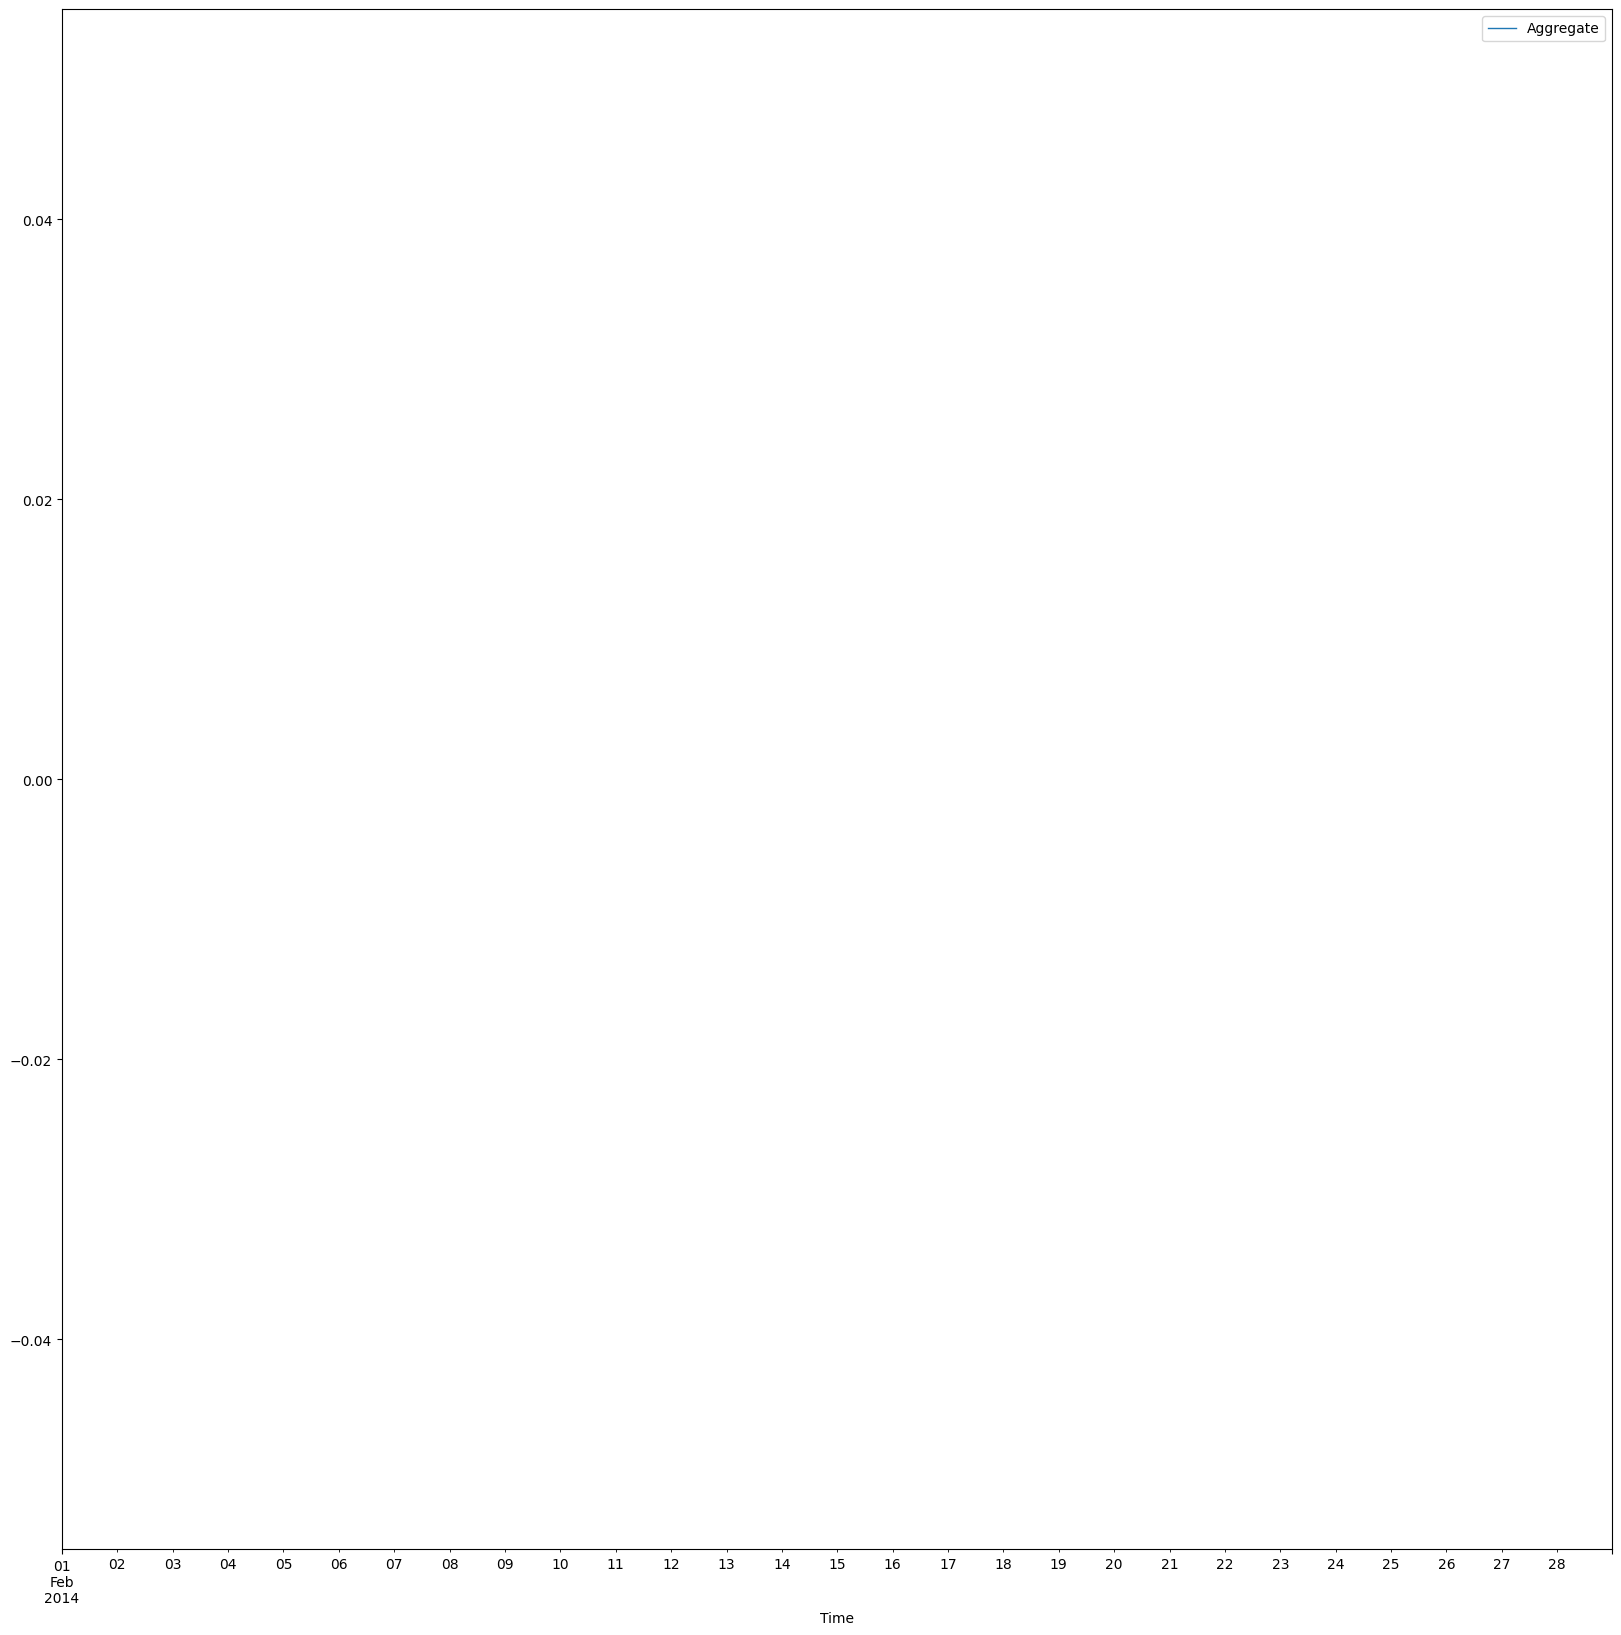

In [56]:
big_plot(condensed_house['2014-02-01 00:00:00':'2014-02-28 23:59:59'])

C:\Users\malte\AppData\Local\Temp\ipykernel_26256\1933269992.py:46: RuntimeWarning: invalid value encountered in scalar divide
  if not current_sequence['values'] or abs(value - current_sequence['values'][-1]) / current_sequence['values'][-1] > 0.05:
C:\Users\malte\AppData\Local\Temp\ipykernel_26256\1933269992.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  if not current_sequence['values'] or abs(value - current_sequence['values'][-1]) / current_sequence['values'][-1] > 0.05:


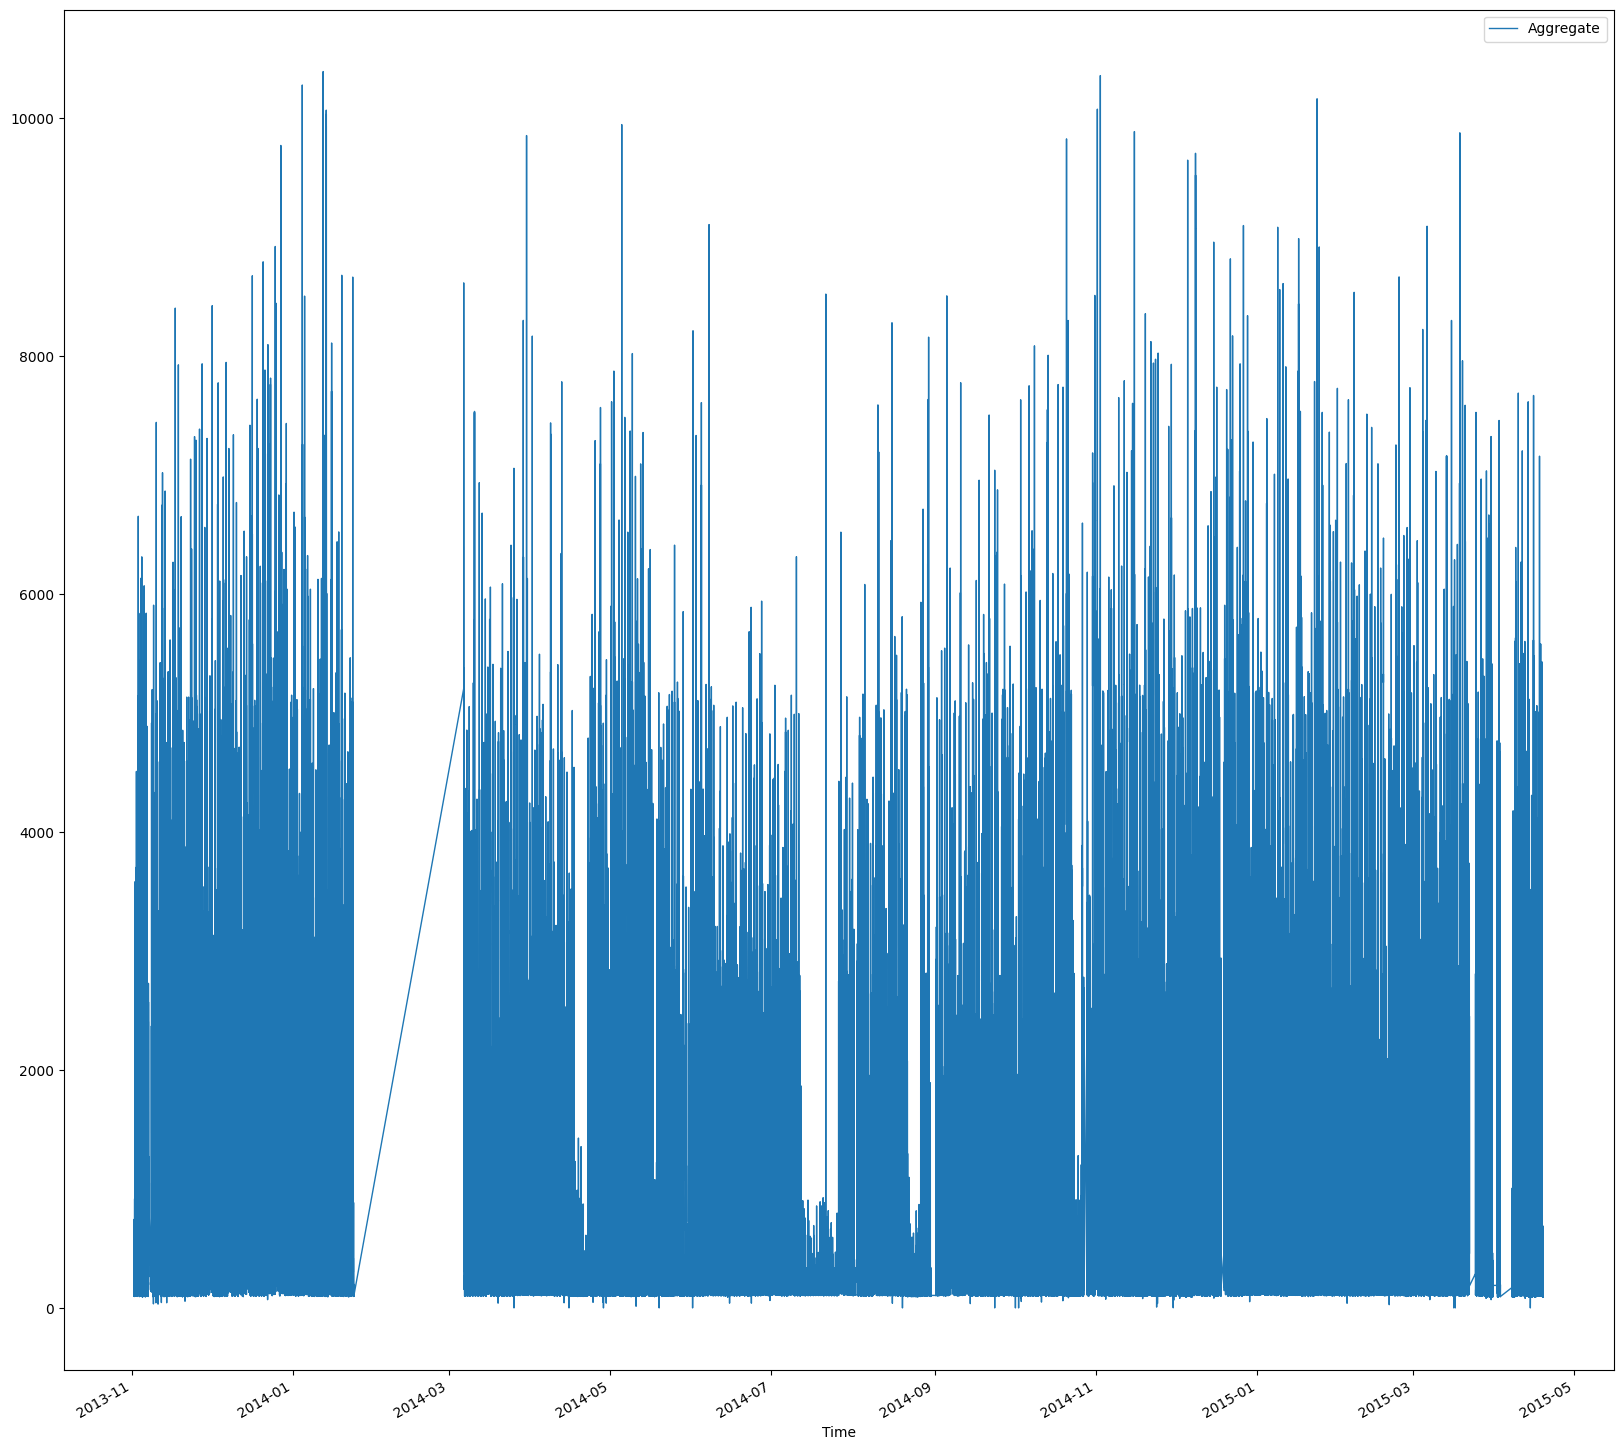

In [5]:
processed_house = process_sequences(house)
big_plot(processed_house)

In [49]:
moving_avg = processed_house['Aggregate'].rolling(window='24H', min_periods=1).mean()

<class 'pandas.core.series.Series'>
DatetimeIndex: 951518 entries, 2013-11-01 22:01:18 to 2015-04-19 05:48:44
Series name: Aggregate
Non-Null Count   Dtype  
--------------   -----  
951518 non-null  float64
dtypes: float64(1)
memory usage: 46.8 MB


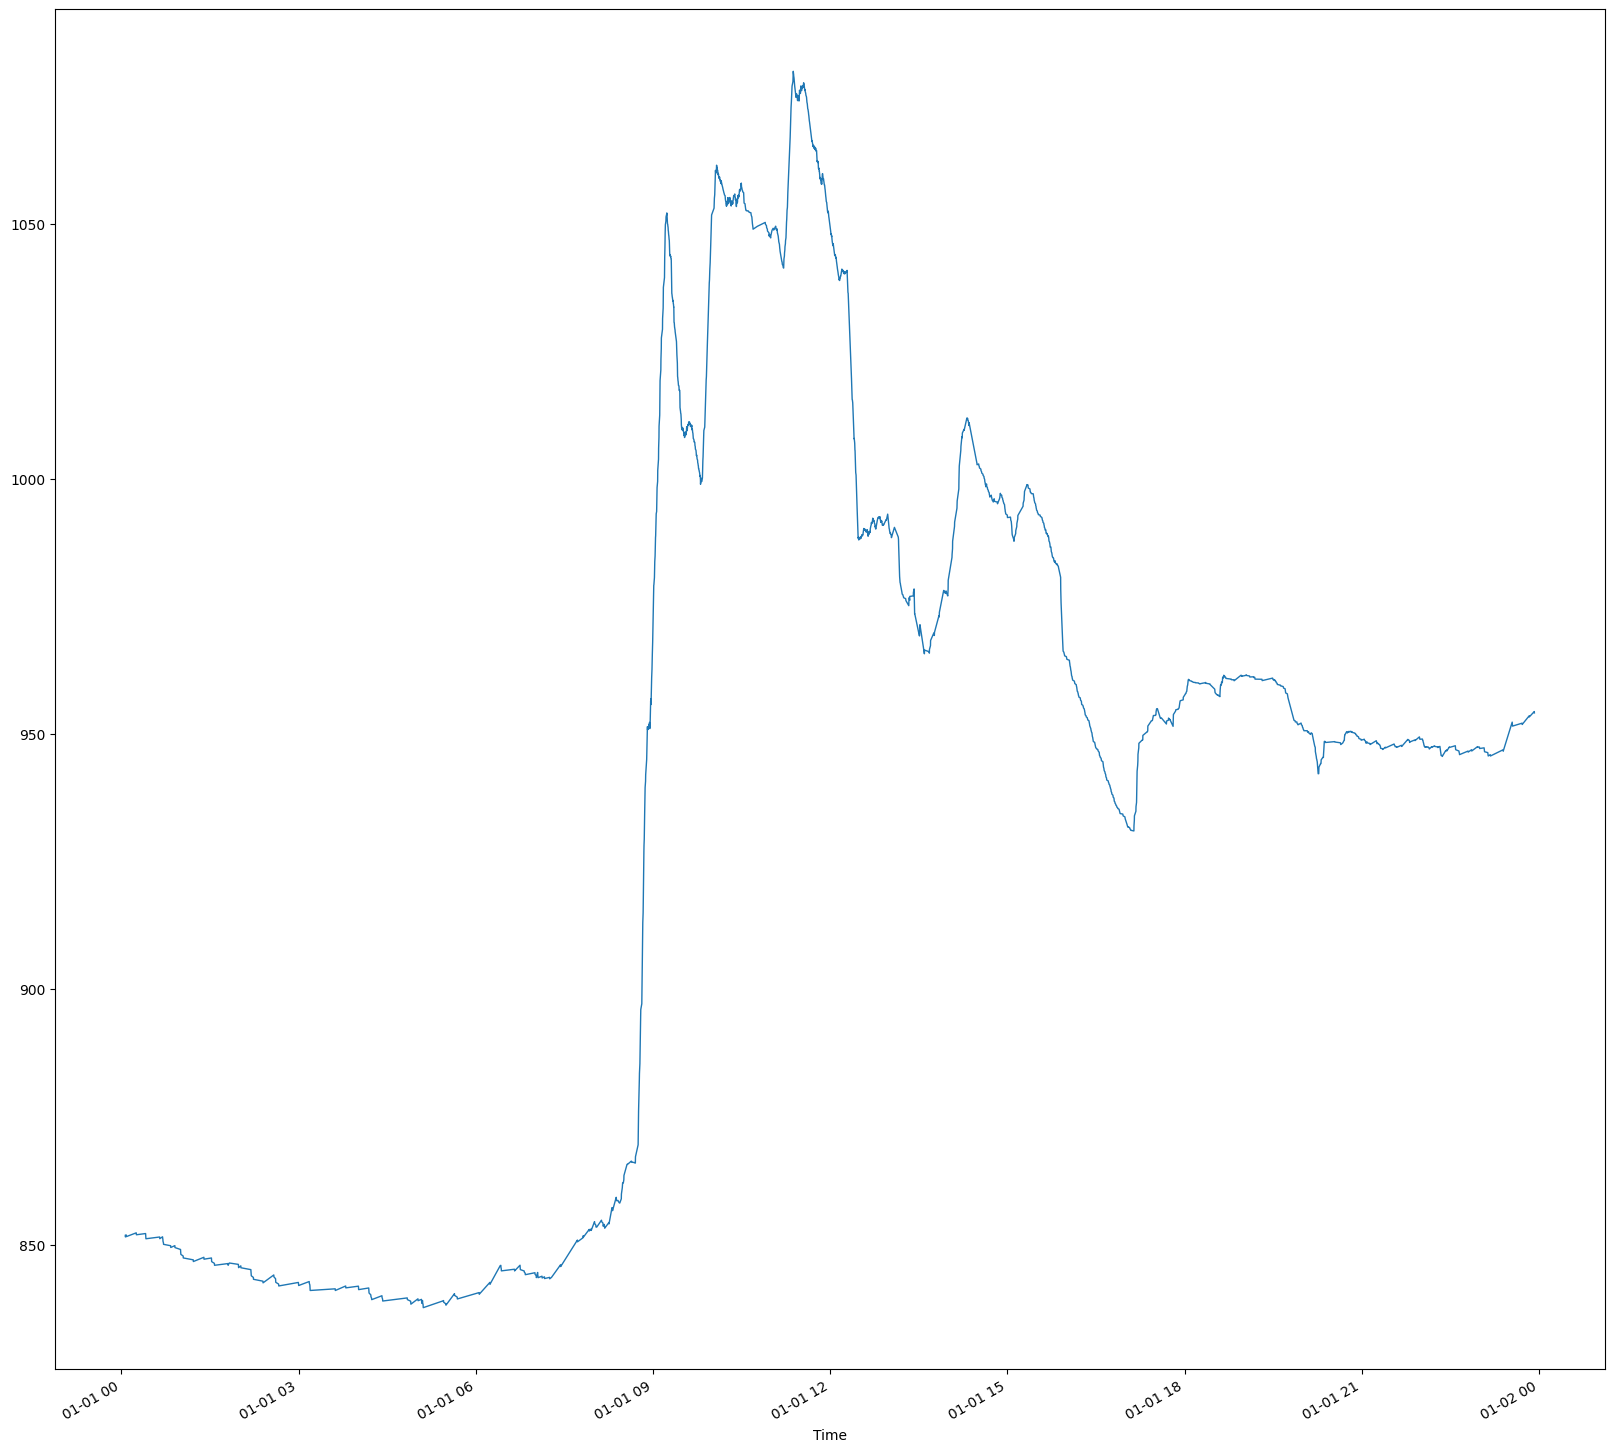

In [50]:
big_plot(moving_avg['2015-01-01 00:00:00':'2015-01-01 23:59:59'])
moving_avg['2015-01-01 00:00:00':'2015-01-01 23:59:59'].head(30)
moving_avg.info()

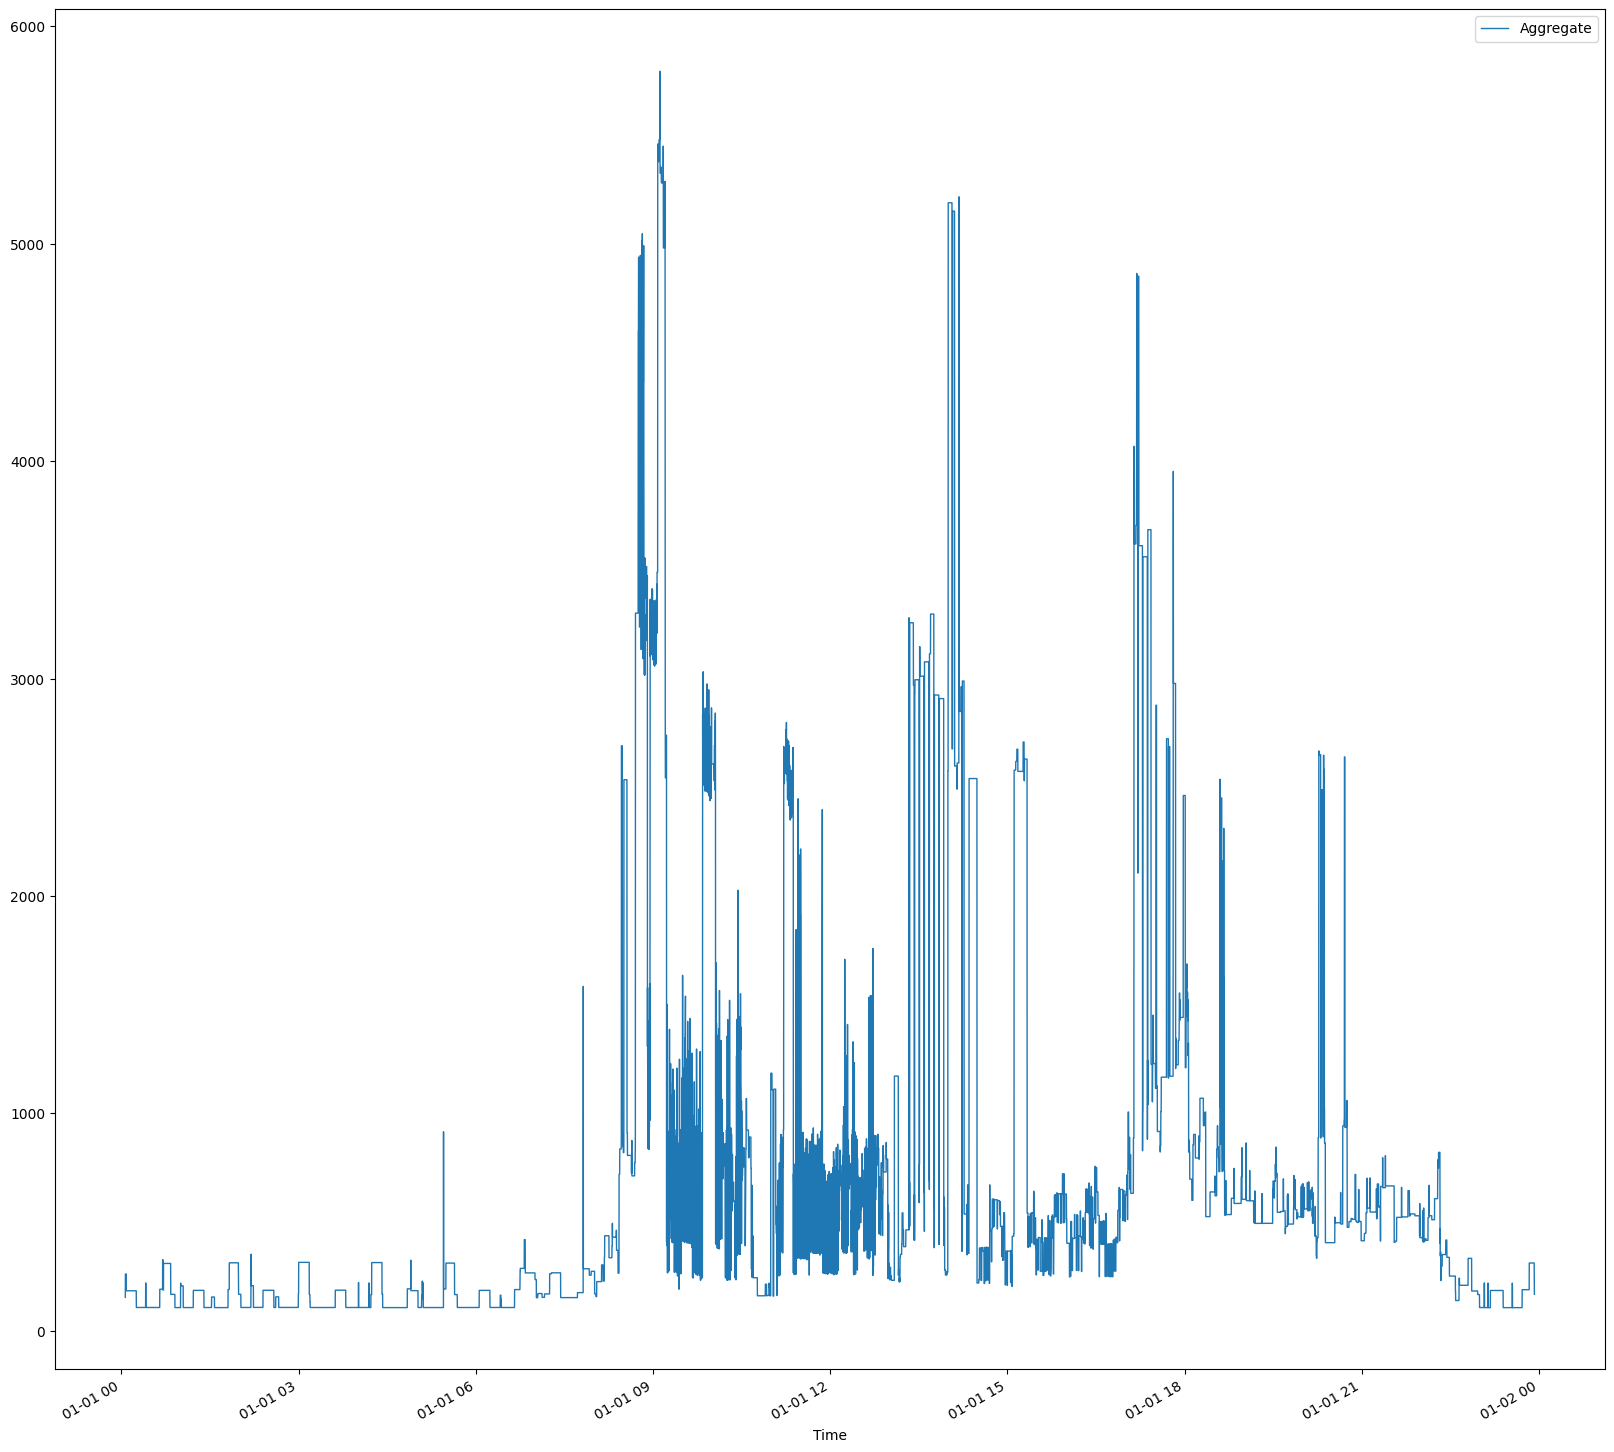

In [26]:
big_plot(processed_house['2015-01-01 00:00:00':'2015-01-1 23:59:59'])

In [28]:
house_only_aggregate = read_clean_house(7,6000000,first_rows=True, drop_appliances=True)
house_only_aggregate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5999939 entries, 2013-11-01 22:01:18 to 2015-04-19 05:48:44
Data columns (total 1 columns):
 #   Column     Dtype
---  ------     -----
 0   Aggregate  int64
dtypes: int64(1)
memory usage: 91.6 MB


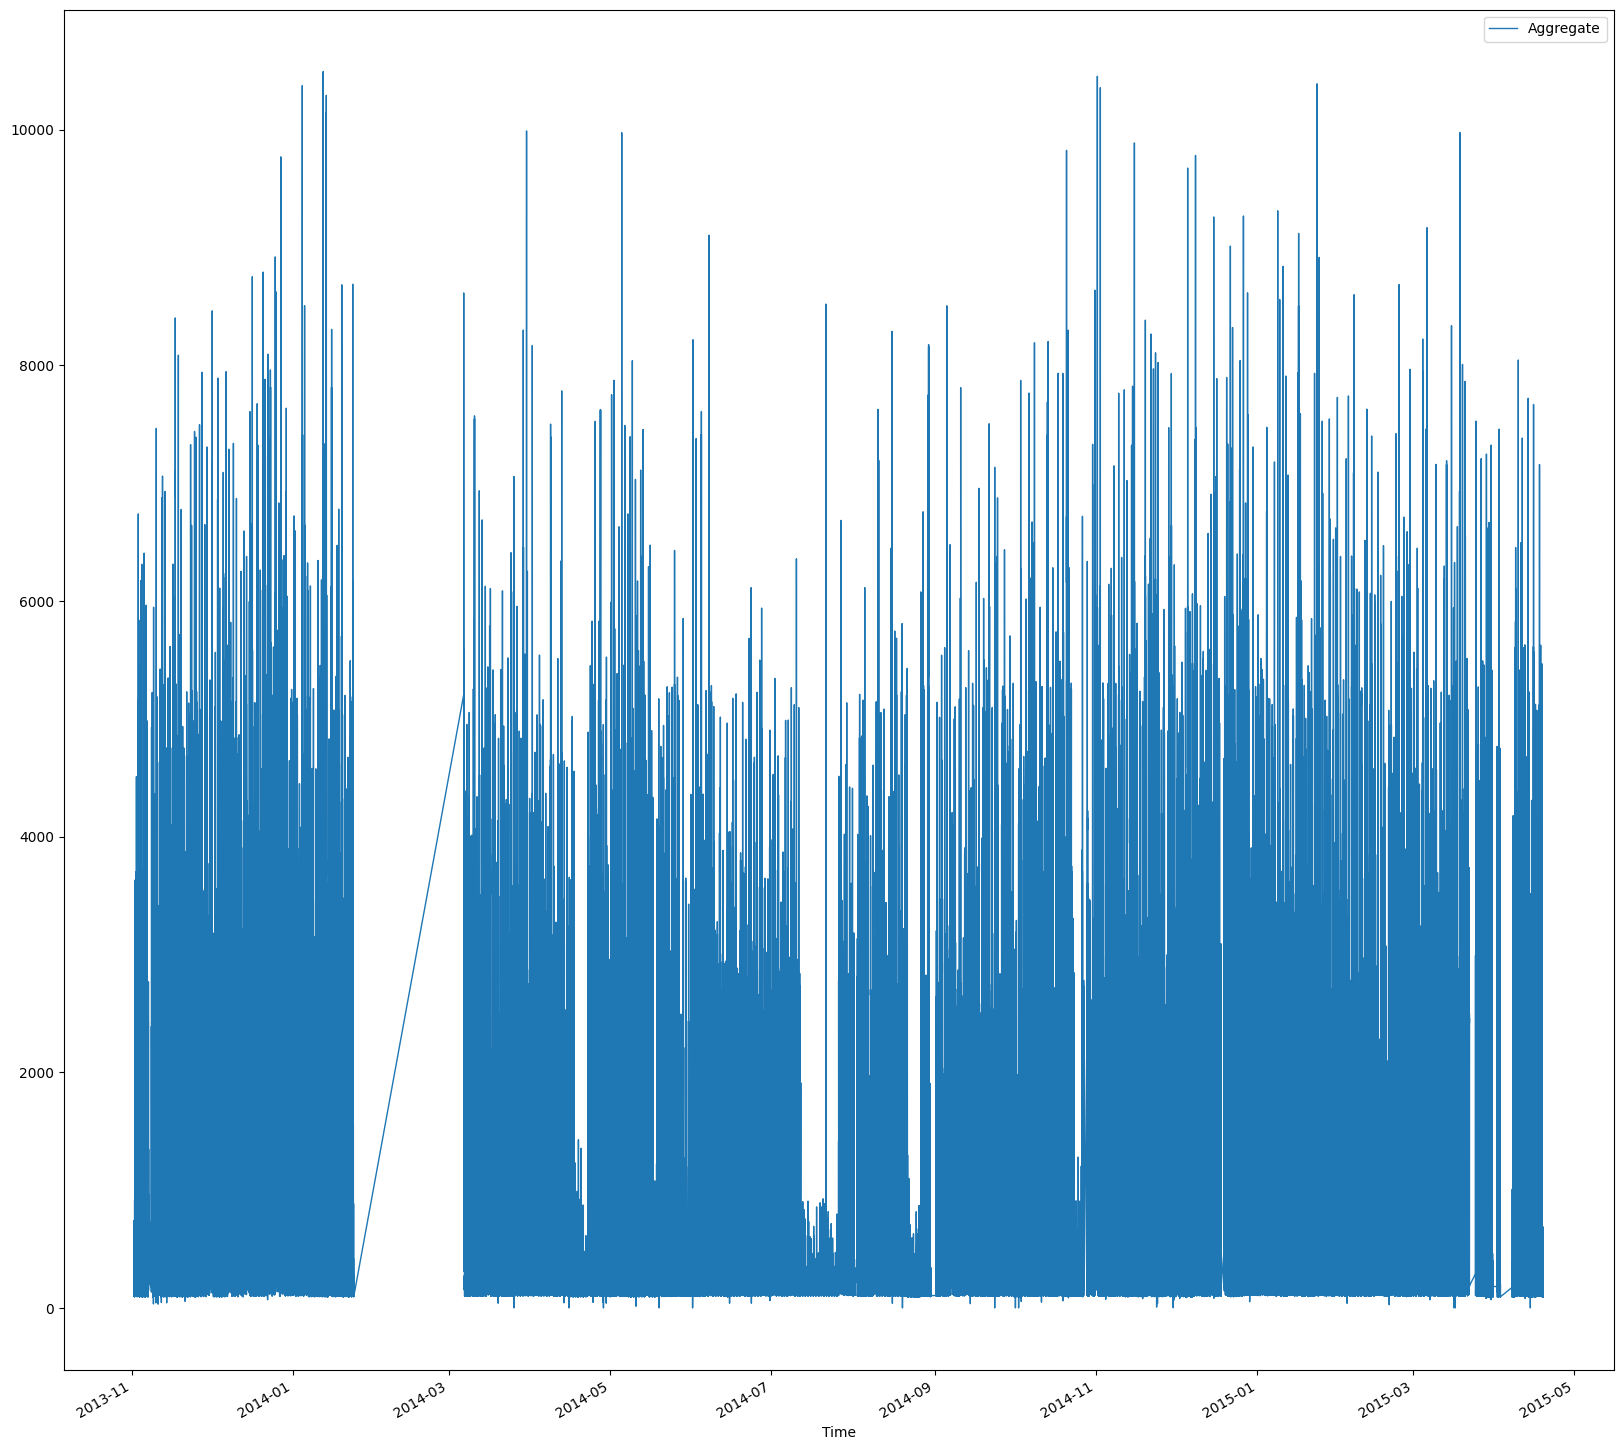

In [31]:
big_plot(house_only_aggregate)

In [1]:
house_only_aggregate.head()

NameError: name 'house_only_aggregate' is not defined

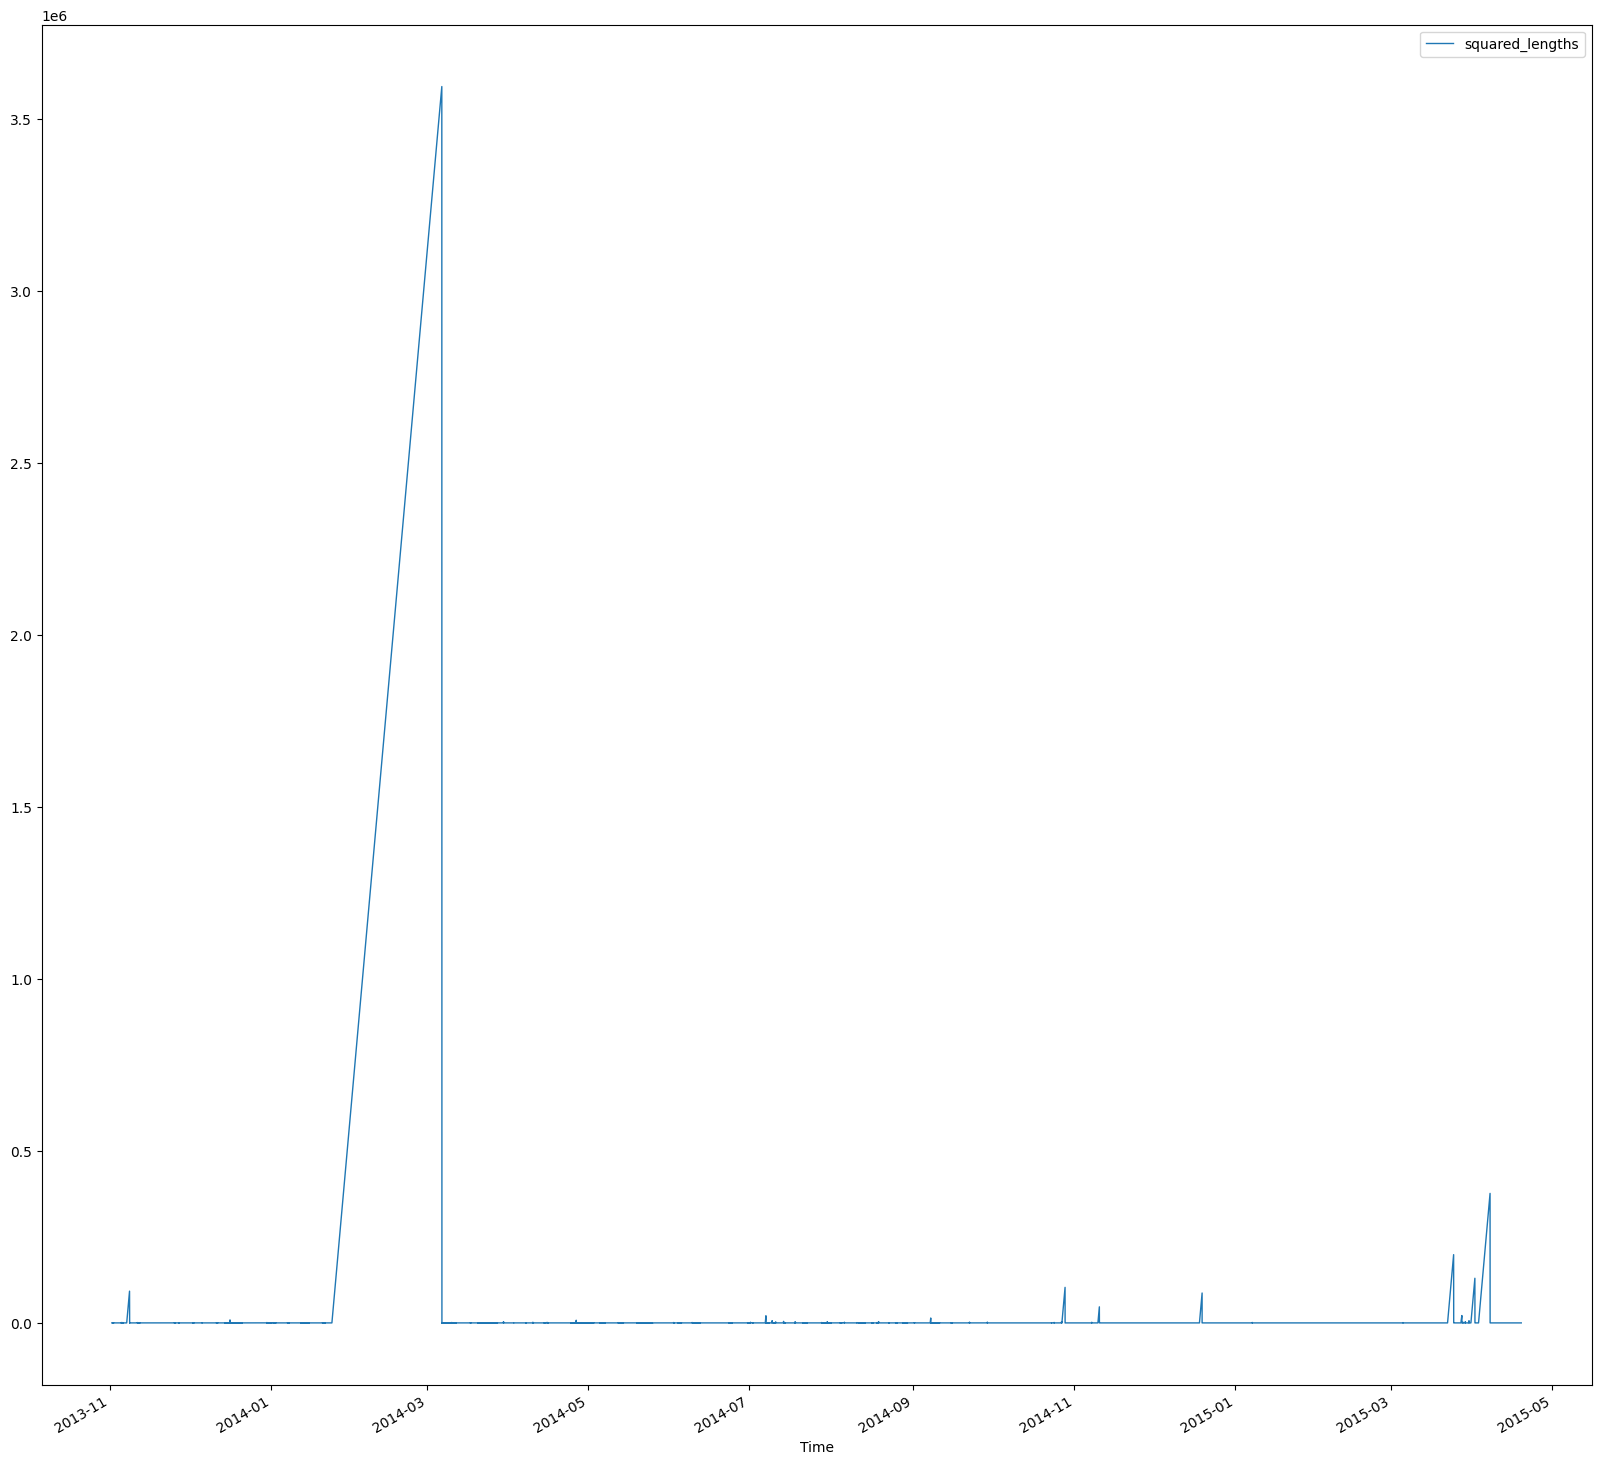

In [63]:
# Assuming 'house_only_aggregate' is your DataFrame and it's indexed by timestamps
# If your DataFrame is not indexed by timestamp, set the index first:
# house_only_aggregate.set_index('YourTimestampColumnName', inplace=True)

# Calculate the differences between consecutive timestamps in seconds
interval_lengths = house_only_aggregate.index.to_series().diff().dt.total_seconds()
interval_lengths = interval_lengths.to_frame(name='squared_lengths')
big_plot(interval_lengths)

In [86]:
filtered = interval_lengths[interval_lengths['squared_lengths'] > 15]
filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21909 entries, 2013-11-01 22:02:47 to 2015-04-15 20:57:47
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   squared_lengths  21909 non-null  float64
dtypes: float64(1)
memory usage: 342.3 KB


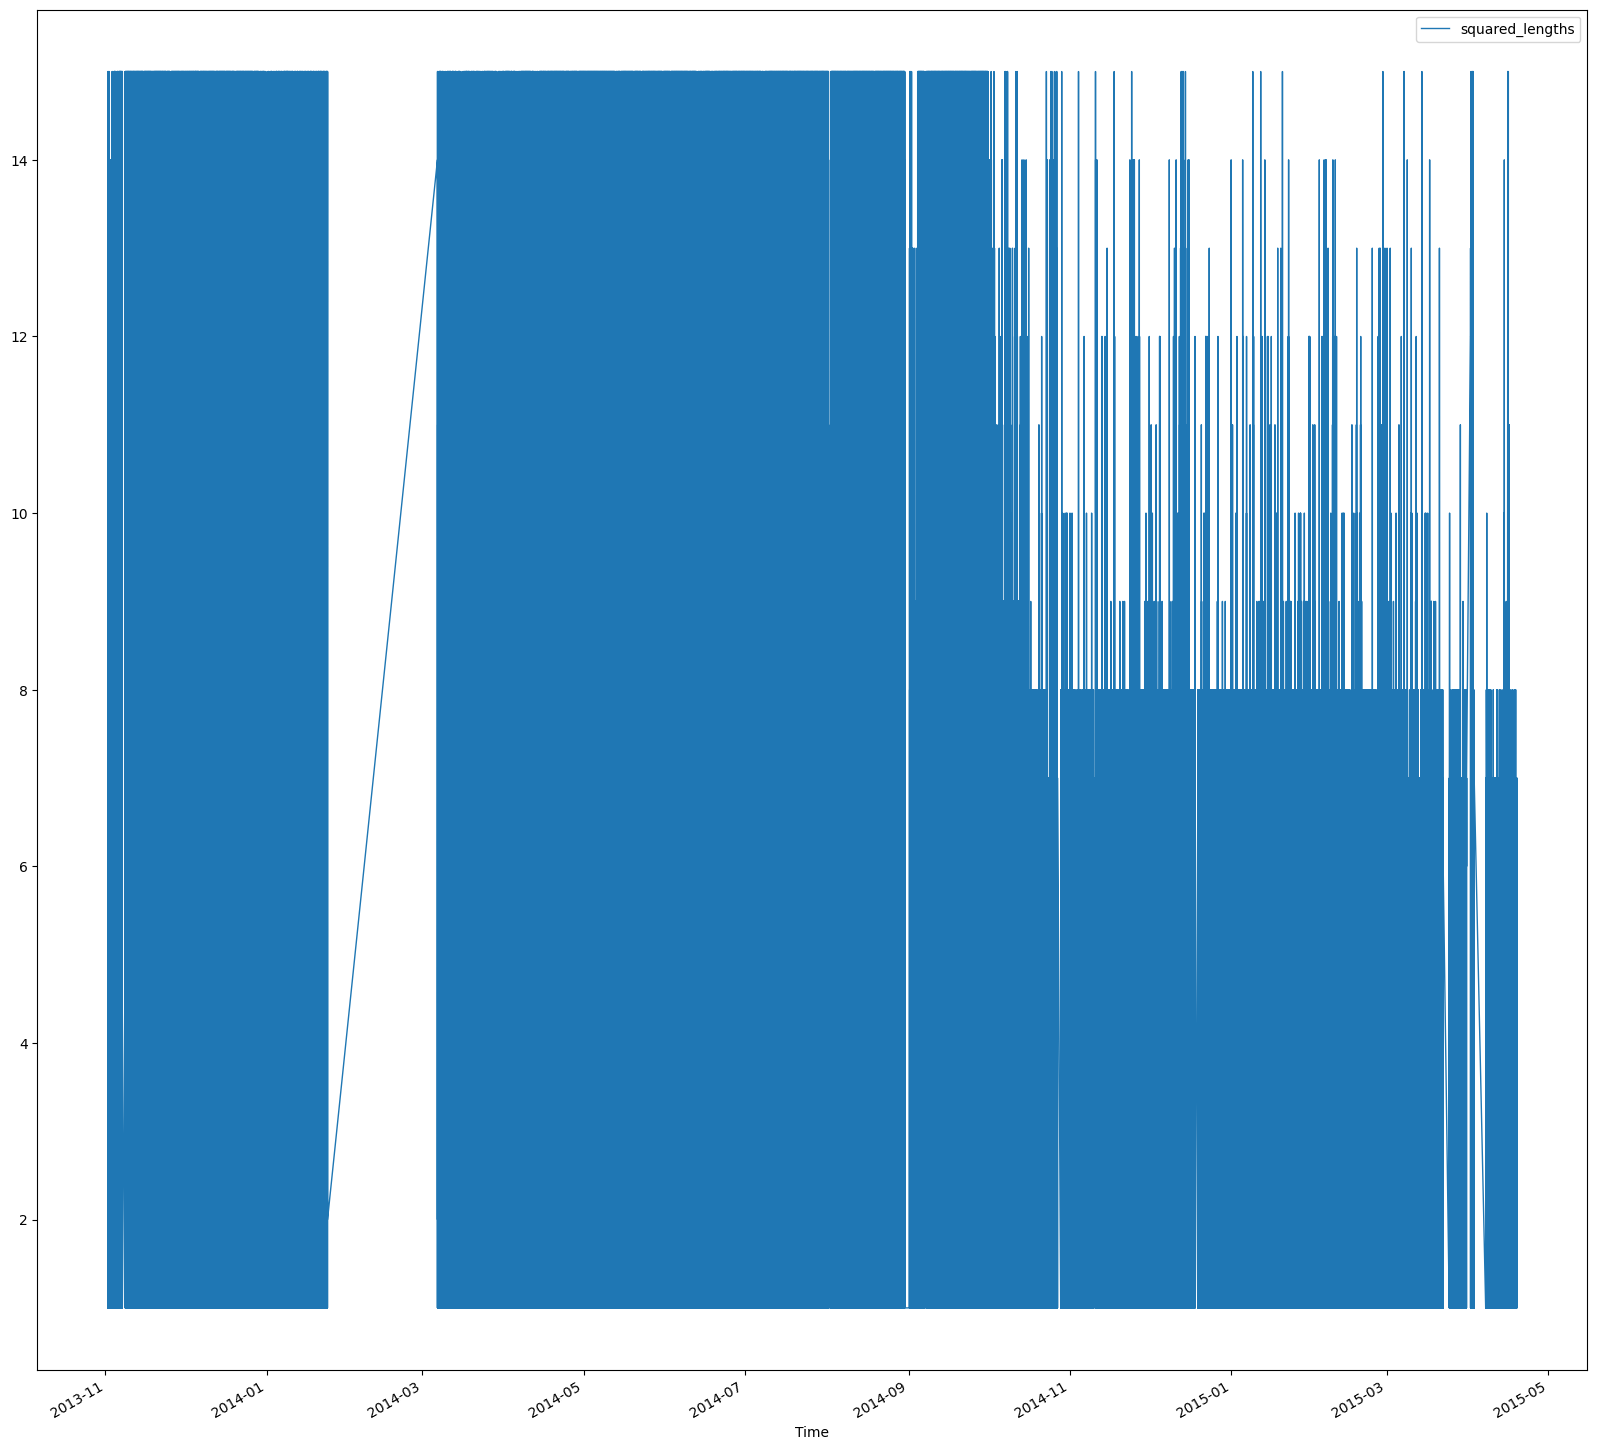

In [89]:
interval_lengths = interval_lengths[interval_lengths['squared_lengths'] <= 20]
big_plot(interval_lengths)

In [ ]:
def cut_long_
    interval_lengths = house_only_aggregate.index.to_series().diff().dt.total_seconds()
    interval_lengths = interval_lengths.to_frame(name='squared_lengths')
    interval_lengths = interval_lengths[interval_lengths['squared_lengths'] <= 15]